In [14]:
#No. 1: interpretation and significance

In [15]:
#In order to make sure the interpretations make sense statistically, 
#we should look at the p-values and t-values, these values can help 
#us to see whether the coefficents are statistically significant. 

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [17]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']

# X is the feature set
X = weather_df[['humidity','windspeed']]

# We add constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:00:03   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.0

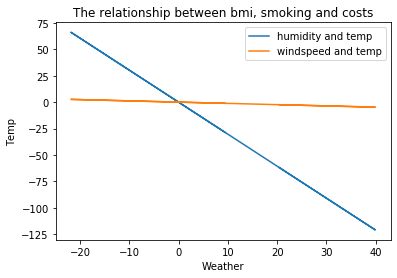

In [18]:
humidity_temp = weather_df.temperature * -3.0292
windspeed_temp = weather_df.temperature * -0.1193

plt.plot(weather_df.temperature, humidity_temp)
plt.plot(weather_df.temperature, windspeed_temp)
plt.legend(["humidity and temp", "windspeed and temp"])
plt.xlabel("Weather")
plt.ylabel("Temp")
plt.title("The relationship between bmi, smoking and costs")

plt.show()

In [19]:
#estimated model is: 
    #diff_apptemp_n_temp = 2.4381-3.0292(humidity)-0.1193(windspeed)

    #They're all statistically significant (ss) because their P-values are less than 0.1
    #The signs on each coefficientS are as I expected, with apparent temps, humidity and windspeed 
    #aren't always factored into what is 'apparent' but it is so in the actual temp
    #interpretation of coeffs: As windspeed increases by one, the difference between the 
    #apparent temp and the temp will decline by 0.1193 on average. As humidity increases by 1, 
    #the difference between the apparent temp and the temp will decrease by 3.0292 degrees.
    

In [23]:
#interaction 
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']

weather_df["humidity"] = weather_df.humidity * weather_df.windspeed

# X is the feature set
X = weather_df[['humidity','windspeed']]

# We add a constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 2.497e+04
Date:                Mon, 20 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:05:05   Log-Likelihood:            -1.6670e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96450   BIC:                         3.334e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2178      0.008     26.385      0.0

In [ ]:
#old diff_apptemp_n_temp = 2.4381-3.0292(humidity)-0.1193(windspeed)
#New estimated model 
    #Diff_apparent_and_temp = 0.2178-0.2854(humidity)+0.0819(windspeed)
    #all coefficients are ss
    #the sign changed for windspeed
    #interpretation of coeffs: As windspeed increases by one, the difference between the 
    #apparent temp and the temp will decline by 0.0819 on average. As humidity increases by 1, 
    #the difference between the apparent temp and the temp will decrease by -0.2854 degrees.
    
